In [3]:
import sympy as sp

# Defincion de simbolos
Avf2, wg = sp.symbols('Avf2 wg')

# Defincion de Constantes
Ad0 = 100 # Ganancia en dB
Avf = 20 # Ganancia en dB
w1 = 2 * sp.pi * 10 # Polo 1 del LM324
w2 = 2 * sp.pi * 5.06e6 # Polo 2 del LM324
fT = 1e6 # Frecuencia de cruce
wT = 2 * sp.pi * fT
M_fase = 65 * sp.pi / 180 # Margen de fase deseado

# Calculado manualmente:
Ri = 10e3
Rf = 90e3
R1 = 10e3
R2 = 36.6e3

# Margen de fase
eq1 = sp.Eq(sp.atan(wg / w1) + sp.atan(wg / wT), sp.pi - M_fase)

# Calculo de Margen de fase
wg = sp.nsolve(eq1, wg, (0, 1e3))
fg = wg / (2 * sp.pi)

# Pendiente de -40 dB/decada
eq2 = sp.Eq(Avf - Ad0 + 20 * (sp.log(wg/w1, 10)), Avf2)

# Calculo de Ganancia del lazo cerrado de AO2
Avf2 = sp.nsolve(eq2, Avf2, (0, 1e3))

# Calculo de Ganancia en banda media del amplificador compuesto
Ad0_compuesto = Ad0 + Avf2

# Conversion de dB a veces
Avf2_veces = 10 ** (Avf2 / 20)

# Calculo de Ancho de banda real
fH = fT/sp.sqrt((Ri+Rf)/Ri)

print(f"wg = {wg:.2f} rad/s")
print(f"fg = {fg:.2f} Hz")
print(f"Avf2 = {Avf2:.2f} dB = {Avf2_veces:.2f} veces")
print(f"Ad0_compuesto = {Ad0_compuesto:.2f} dB")
print(f"fH = {fH:.2f} Hz")

wg = 2930061.46 rad/s
fg = 466333.77 Hz
Avf2 = 13.37 dB = 4.66 veces
Ad0_compuesto = 113.37 dB
fH = 316227.77 Hz


In [2]:
import sympy as sp
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Defincion de simbolos
Avf2, wg = sp.symbols('Avf2 wg')

# Defincion de Constantes
Ad0_dB = 100 # Ganancia DC en dB
Ad0_veces = 100e3 # Ganancia DC en veces
Avf = 20 # Ganancia Lazo Cerrado en dB
f1 = 10 # Polo 1 del LM324
f2 = 5.06e6 # Polo 2 del LM324
w1 = 2 * sp.pi * f1 # Polo 1 del LM324
w2 = 2 * sp.pi * f2 # Polo 2 del LM324
fT = 1e6 # Frecuencia de cruce
wT = 2 * sp.pi * fT # Frecuencia angular de cruce
M_fase = 65 * sp.pi / 180 # Margen de fase deseado

# Valores calculados manualmente:
Ri = 10e3
Rf = 90e3
R1 = 10e3
R2 = 36.6e3

# Margen de fase
eq1 = sp.Eq(sp.atan(wg / w1) + sp.atan(wg / (2*sp.pi*631e3)), sp.pi - M_fase)

# Calculo de Margen de fase
wg = sp.nsolve(eq1, wg, (0, 1e3))
fg = wg / (2 * sp.pi)

# Pendiente de -40 dB/decada
eq2 = sp.Eq(Avf - Ad0_dB + 20 * (sp.log(wg/w1, 10)), Avf2)

# Calculo de Ganancia del lazo cerrado de AO2
Avf2 = sp.nsolve(eq2, Avf2, (0, 1e3))

# Calculo de Ganancia en banda media del amplificador compuesto
Ad0_dB_compuesto = Ad0_dB + Avf2

# Conversion de dB a veces
Avf2_veces = 10 ** (Avf2 / 20)

# Calculo de Ancho de banda potencial:
fH = fT/sp.sqrt((Ri+Rf)/Ri)

print(f"wg = {wg:.2f} rad/s")
print(f"fg = {fg:.2f} Hz")
print(f"Avf2 = {Avf2:.2f} dB = {Avf2_veces:.2f} veces")
print(f"Ad0_dB_compuesto = {Ad0_dB_compuesto:.2f} dB")
print(f"Ancho de banda potencial fH = {fH:.2f} Hz")


wg = 1848929.31 rad/s
fg = 294266.24 Hz
Avf2 = 9.37 dB = 2.94 veces
Ad0_dB_compuesto = 109.37 dB
Ancho de banda potencial fH = 316227.77 Hz


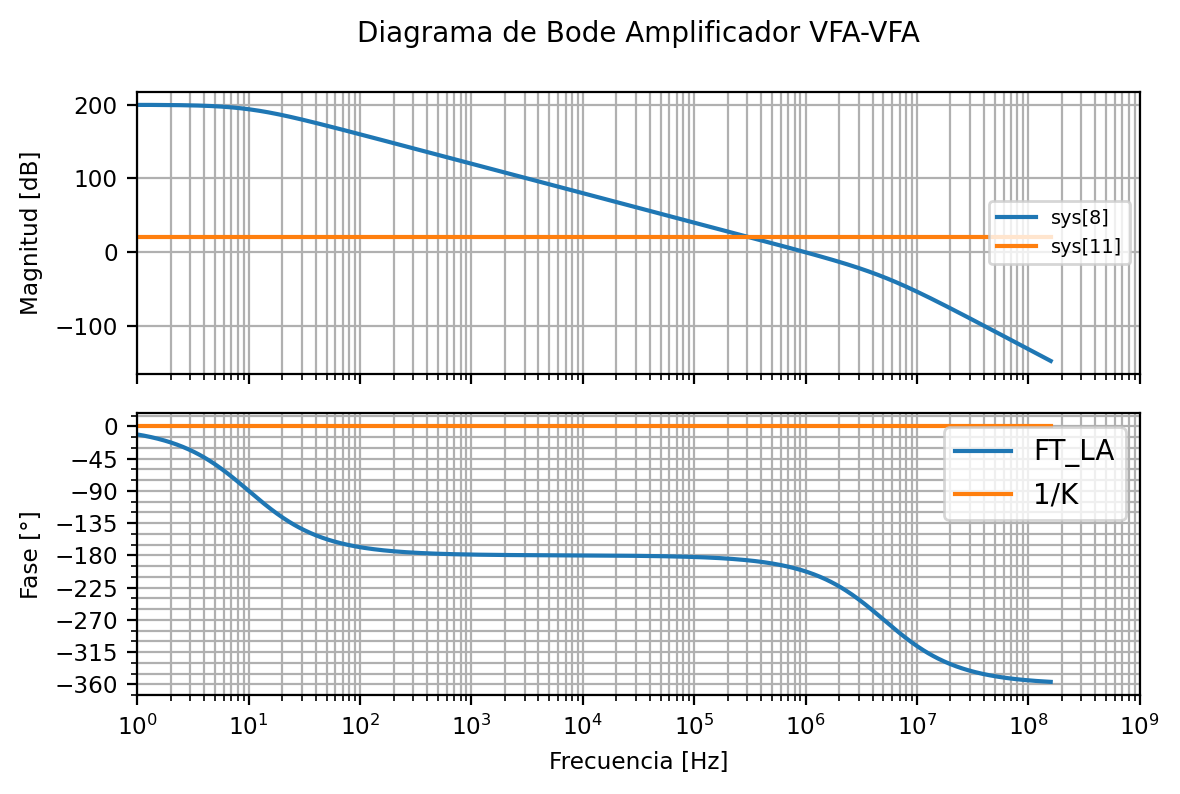

In [4]:
import sympy as sp
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Defincion de simbolos
Avf2, wg = sp.symbols('Avf2 wg')

# Defincion de Constantes
Ad0_dB = 100                # Ganancia DC en dB
Ad0_veces = 100e3           # Ganancia DC en veces
Avf = 20                    # Ganancia Lazo Cerrado en dB
f1 = 10                     # Polo 1 del LM324
f2 = 5.06e6                 # Polo 2 del LM324
w1 = 2 * sp.pi * f1         # Polo 1 del LM324
w2 = 2 * sp.pi * f2         # Polo 2 del LM324
fT = 1e6                    # Frecuencia de cruce
wT = 2 * sp.pi * fT         # Frecuencia angular de cruce
M_fase = 65 * sp.pi / 180   # Margen de fase deseado

# Valores calculados manualmente:
Ri = 10e3
Rf = 90e3
# R1 = 10e3
# R2 = 36.6e3

# Funcion de transferencia Lazo abierto de LM324
num = [Ad0_veces * (2 * np.pi)**2 * f1 * f2]
den = [1, 2 * np.pi * (f1 + f2), (2 * np.pi)**2 * f1 * f2]
AV_LA = ct.TransferFunction(num, den)

# Amplificador en Cascada
sistema_total = AV_LA * AV_LA

# Cantidad de realimentacion K
K = ct.TransferFunction([Ri/(Ri+Rf)], [1])

# Configuracion de grafico
plt.figure(figsize=(6, 4), dpi=200)

# Traza el grafico
ct.bode_plot(
    [sistema_total, 1/K],                           # Curvas a graficar
    dB=True,                                        # Magnitud en dB
    Hz=True,                                        # Abcisas en Hz
    deg=True,                                       # Fase en grados
    omega_limits=(1, 10e8),                         # Rango de frecuencia a graficar
    title='Diagrama de Bode Amplificador VFA-VFA',
    phase_label='Fase [°]',
    magnitude_label='Magnitud [dB]',
    freq_label='Frecuencia [Hz]',
)

# Añadir leyendas
plt.legend(['FT_LA', '1/K'])